In [1]:
# Multiple Linear Regression

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Import dataset
dataset = pd.read_csv('health_insurance_cost.csv')
dataset.describe()
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 6].values


In [3]:
dataset.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [30]:
X

array([[19, 'female', 27.9, 0, 'yes', 'southwest'],
       [18, 'male', 33.77, 1, 'no', 'southeast'],
       [28, 'male', 33.0, 3, 'no', 'southeast'],
       ...,
       [18, 'female', 36.85, 0, 'no', 'southeast'],
       [21, 'female', 25.8, 0, 'no', 'southwest'],
       [61, 'female', 29.07, 0, 'yes', 'northwest']], dtype=object)

In [31]:
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [32]:
# Preprocessing: 
# Handle Categorical variables using OneHotEncoder
# Preprocess Gender column
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import Normalizer, OneHotEncoder, StandardScaler
colT = ColumnTransformer(remainder='drop', transformers=
    [("dummy_gender", OneHotEncoder(categories='auto'), [1])])
genders = colT.fit_transform(X)

In [33]:
colT

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('dummy_gender',
                                 OneHotEncoder(categorical_features=None,
                                               categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='error',
                                               n_values=None, sparse=True),
                                 [1])],
                  verbose=False)

In [34]:
# Avoid Dummy variable trap
genders = genders[:, 1:]

In [35]:

# Preprocess Smoker column
colT = ColumnTransformer(remainder='drop', transformers=
    [("dummy_smoker", OneHotEncoder(categories='auto'), [4])])
smokers = colT.fit_transform(X)
# Avoid Dummy variable trap
smokers = smokers[:, 1:]


In [36]:
# Preprocess Region column
colT = ColumnTransformer(remainder='drop', transformers=
    [("dummy_region", OneHotEncoder(categories='auto'), [5])])
regions = colT.fit_transform(X)
# Avoid Dummy variable trap
regions = regions[:, 1:]


In [37]:
# Remove the original categorical columns
X = np.delete(X, [1,4,5], axis=1)

In [38]:
# Concatenate dummy variables
# = np.concatenate((genders, smokers, regions.toarray(), X), axis=1)


In [39]:

# Split dataset into Training and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [40]:

# Feature Scaling
# Alternative: ColumnTransformer
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(np.array(y_train).reshape(-1, 1))
X_test = sc_X.fit_transform(X_test)
y_test_org = y_test
y_test = sc_y.fit_transform(np.array(y_test).reshape(-1, 1))


In [41]:
# Multiple Linear Regression with Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
# Predict Test set
y_pred = regressor.predict(X_test)


In [43]:

# Print unscaled test and predicted values
y_pred_inv = sc_y.inverse_transform(y_pred)
print(pd.DataFrame(np.column_stack((y_test_org, y_pred_inv))).head(10))


print('--------------------------------------------')
# Coefficient & Intercept
print('Coefficient: ', regressor.coef_)
print('Intercept: ', regressor.intercept_)


             0             1
0   9724.53000  16270.869157
1   8547.69130  14811.431770
2  45702.02235  19556.100924
3  12950.07120  20455.149928
4   9644.25250  11202.202160
5   4500.33925   8325.575499
6   2198.18985   6232.430947
7  11436.73815  19555.713511
8   7537.16390  14398.349780
9   5425.02335  13039.434451
--------------------------------------------
Coefficient:  [[0.2593242  0.15397579 0.06671177]]
Intercept:  [-7.20785692e-16]


In [44]:
# Metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Root Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % explained_variance_score(y_test, y_pred))
# Coefficient of determination
print('R^2 Square value', r2_score(y_test, y_pred))


Mean absolute error: 0.72
Mean squared error: 0.83
Root Mean squared error: 0.91
Variance score: 0.17
R^2 Square value 0.16981181977159854


In [45]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [46]:
X_train

array([[-0.14853305,  0.54530479,  2.41394802],
       [-1.49780784,  0.59867181, -0.89219519],
       [-1.14273553,  0.96092064,  0.76087642],
       ...,
       [ 0.06451033, -0.91339361, -0.89219519],
       [-1.42679338,  0.77656186, -0.89219519],
       [-0.4325909 , -1.97749955, -0.06565939]])

In [48]:
lr_pred =regressor.predict(np.array([[20,27,1]]))

In [49]:
print(lr_pred)

[[9.41054225]]


In [1]:
from IPython.display import Image

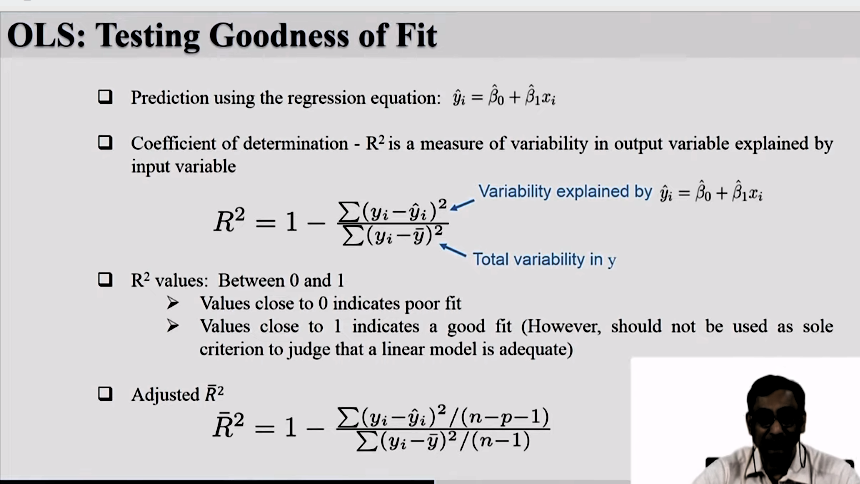

In [3]:
Image(filename='R square.png', width=700) 